In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **Student Score Prediction**
![](https://images.freeimages.com/clg/istock/previews/9207/92071461-students-writing-an-exam.jpg)

## **Import Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics 

## **Import Dataset**

In [3]:
data=pd.read_csv("https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


## **Explore The Dataset**

In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


We can understand that thee are 25 values in total.The minimum score is 17 and maximum is 95.The maximum time taken for study is 9 hour and minimum time is 1 hour.

In [6]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

There is no null values.

In [7]:
data.shape

(25, 2)

The dataset have 25 raws and 2 columns

## **Data Visualisation**

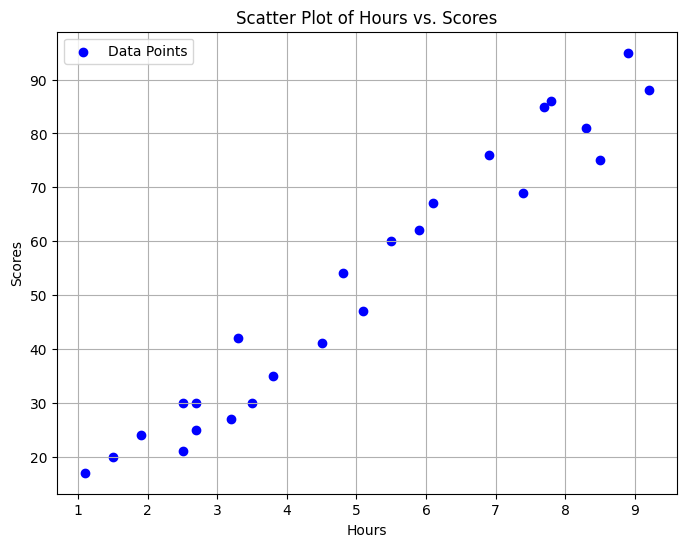

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Hours'], data['Scores'], c='blue', marker='o', label='Data Points')
plt.title('Scatter Plot of Hours vs. Scores')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.grid(True)
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

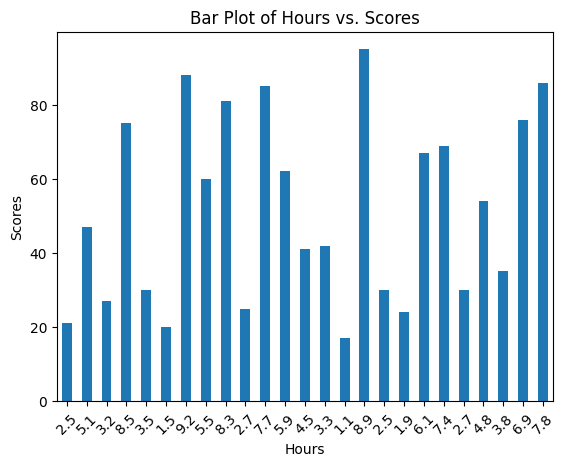

In [9]:
plt.figure(figsize=(10, 6))
data.plot(kind='bar', x='Hours', y='Scores', legend=False)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Bar Plot of Hours vs. Scores')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

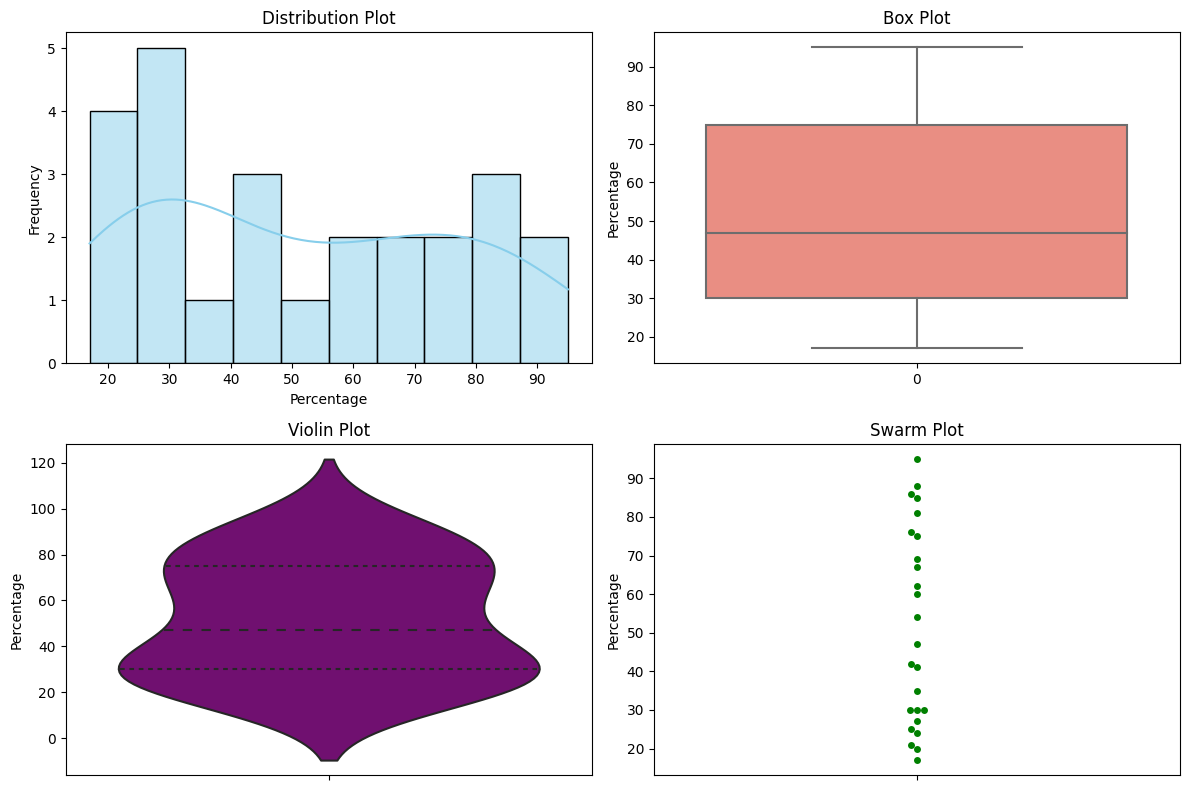

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Distribution Plot (Histogram)
sns.histplot(data['Scores'], bins=10, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_xlabel('Percentage')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution Plot')

# Box Plot
sns.boxplot(data['Scores'], color='salmon', ax=axes[0, 1])
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].set_title('Box Plot')

# Violin Plot
sns.violinplot(y=data['Scores'], color='purple', inner='quartile', ax=axes[1, 0])
axes[1, 0].set_ylabel('Percentage')
axes[1, 0].set_title('Violin Plot')

# Swarm Plot (No subscript notation)
sns.swarmplot(y=data['Scores'], color='green', ax=axes[1, 1])
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].set_title('Swarm Plot')

# Adjust layout
plt.tight_layout()
plt.show()

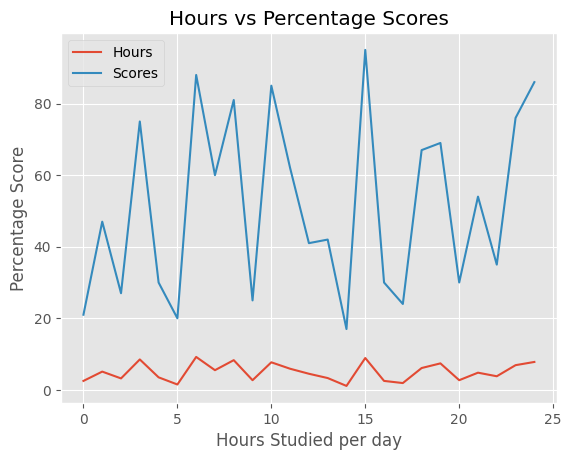

In [11]:
plt.style.use('ggplot')
data.plot(kind='line')
plt.title('Hours vs Percentage Scores', color='black')
plt.xlabel('Hours Studied per day')
plt.ylabel('Percentage Score')
plt.show()

## **Model Selection and Training**

In [12]:
X = data.iloc[:, :-1].values  # Independent variable (Hours) also known as Features
y = data.iloc[:, 1].values  # Dependent variable(Scores) also known as Target

In [13]:
#Split the data to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=0)

In [14]:
Model=LinearRegression()
Model.fit(X_train,y_train)

LinearRegression()

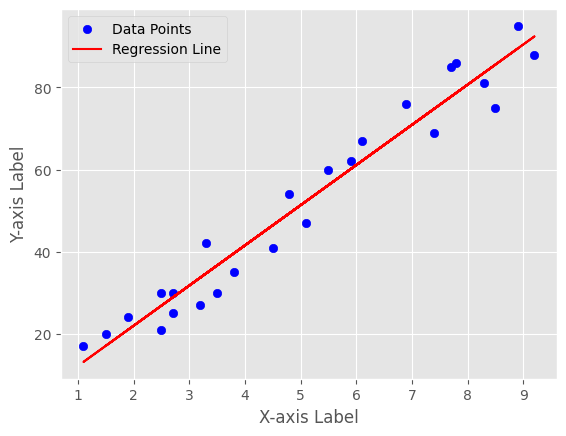

In [15]:
# Scatter plot for the data points
plt.scatter(X, y, color='blue',label='Data Points')

# Plotting the regression line using the model's predictions
plt.plot(X, Model.predict(X), color='red', label='Regression Line')

# Labels and legend
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.legend()

# Display the plot
plt.show()

## **Prediction on test data**

In [16]:
y_pred = Model.predict(X_test)

In [17]:
score=pd.DataFrame({'Actual':y_test,'Prediction':y_pred})
score

,Actual,Prediction
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


## **Test with our own data**

In [18]:
new_hours=9.25
predicted_score=Model.predict([[new_hours]])
print("The predicted score for",new_hours,"is",predicted_score[0])

The predicted score for 9.25 is 92.91505723477056


## **Model Evaluation**

In [19]:
 print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('R-Squared',metrics.r2_score(y_test,y_pred))

Mean Absolute Error: 4.419727808027651
RMSE: 4.7921912746363144
R-Squared 0.9568211104435257
